# Kyle Calabro
# DATA 750 - Thesis in Data Science
# 12 August 2021
---

# Notebook One:
---
## Peforms initial EDA, data preprocessing and feature extraction
## Generates a CSV with all necessary data prepared to begin generating models with

In [1]:
import librosa
import librosa.display

%matplotlib inline
import matplotlib.pyplot as plt 
from matplotlib.pyplot import specgram

import seaborn as sns

import IPython.display as ipd
from IPython.display import Audio

import seaborn as sns

import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow.keras

import os
import sys
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# To ignore deprecation warnings...
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category = DeprecationWarning)

# Utility Functions
---

In [2]:
emotions_dict = {1 : "Neutral", 2 : "Calm", 3 : "Happy", 4 : "Sad", 5 : "Angry", 6 : "Fear", 7 : "Disgust", 8: "Surprise"}

In [3]:
# To generate and display a waveplot of a given audio file
# Params:
    # x: audio time series
    # sr: target sampling rate
    # title: The title of the waveplot
    
def display_waveplot(x, sr, title):
    plt.figure(figsize = (8, 4))
    librosa.display.waveplot(x, sr = sr)
    plt.title(title);

In [4]:
# To generate and display a spectrogram of a given audio file
# Params:
    # x: audio time series
    # sr: target sampling rate
    # title: The title of the spectrogram

def display_log_mel_spectrogram(x, sr, title):
    spectrogram = librosa.feature.melspectrogram(y = x, sr = sr, n_mels = 128, fmax = 8000) 
    spectrogram = librosa.power_to_db(spectrogram)

    librosa.display.specshow(spectrogram, y_axis = "mel", fmax = 8000, x_axis = "time");
    plt.title(title)
    plt.colorbar(format = "%+2.0f dB");

In [5]:
# To create a directory of the audio files for the purpose of
# easily generating a dataframe
# Params:
    # path_name: the path to the files

def get_actors_list(path_name):
    audio = path_name
    actor_folders = os.listdir(audio)
    actor_folders.sort()

    return actor_folders

In [6]:
# To build out a dataframe of all the audio files
# Params:
    # actors_list: list of actors in the data set
    # path: the path name to the audio files
    
def create_audio_files_df(actors_list, path):
    emotion = []
    gender = []
    actors = []
    file_path = []

    for actor in actors_list:
        filename = os.listdir(path + "/" + actor)

        for file in filename:
            part = file.split(".")[0].split("-")

            emotion.append(int(part[2]))
            actors.append(int(part[6]))
            actor_gender = int(part[6])

            if actor_gender % 2 == 0:
                actor_gender = "female"
            else:
                actor_gender = "male"

            gender.append(actor_gender)
            file_path.append(path + "/" + actor + "/" + file)
    
    # Build out the dataframe starting with the emotion(s)...
    audio_df = pd.DataFrame(emotion)
    audio_df = audio_df.replace(emotions_dict)

    # Add in the gender and actors...
    audio_df = pd.concat([pd.DataFrame(gender), audio_df, pd.DataFrame(actors)], axis = 1)
    audio_df.columns = ["Gender", "Emotion", "Actor"]

    # Add the path name of the file...
    audio_df = pd.concat([audio_df, pd.DataFrame(file_path, columns = ["path"])], axis = 1)

    return audio_df

# Exploratory Data Analysis
---

## Male Neutral
---

In [7]:
x, sr = librosa.load("./data/audio_files/Actor_01/03-01-01-01-01-01-01.wav")

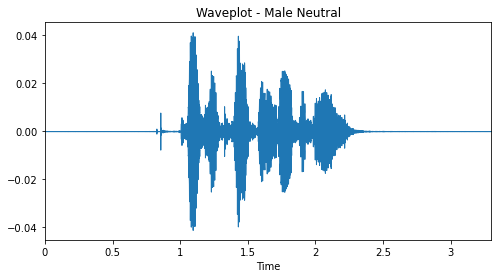

In [31]:
display_waveplot(x, sr, "Waveplot - Male Neutral")

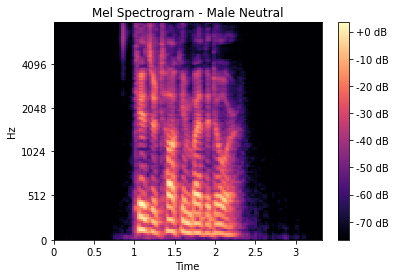

In [8]:
display_log_mel_spectrogram(x, sr, "Mel Spectrogram - Male Neutral")

## Female Calm
---

In [13]:
x, sr = librosa.load("./data/audio_files/Actor_02/03-01-02-01-01-01-02.wav")

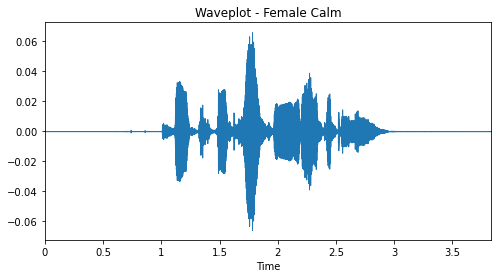

In [14]:
display_waveplot(x, sr, "Waveplot - Female Calm")

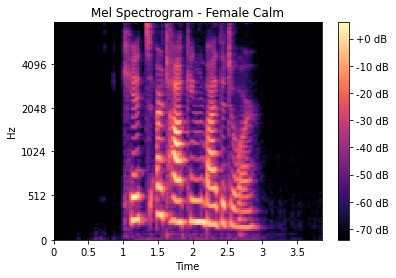

In [15]:
display_log_mel_spectrogram(x, sr, "Mel Spectrogram - Female Calm")

## Male Happy
---

In [16]:
x, sr = librosa.load("./data/audio_files/Actor_03/03-01-03-01-01-01-03.wav")

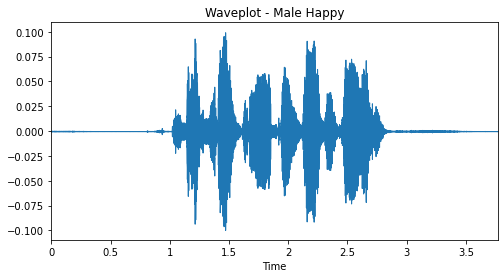

In [17]:
display_waveplot(x, sr, "Waveplot - Male Happy")

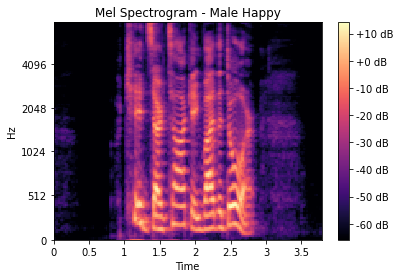

In [18]:
display_log_mel_spectrogram(x, sr, "Mel Spectrogram - Male Happy")

## Female Sad
---

In [19]:
x, sr = librosa.load("./data/audio_files/Actor_04/03-01-04-01-01-01-04.wav")

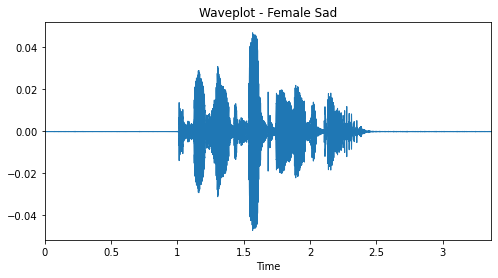

In [20]:
display_waveplot(x, sr, "Waveplot - Female Sad")

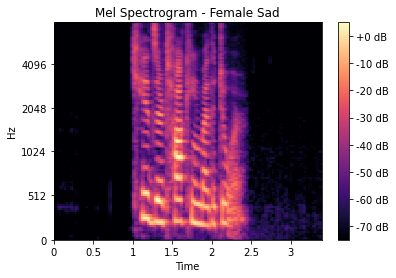

In [21]:
display_log_mel_spectrogram(x, sr, "Mel Spectrogram - Female Sad")

## Male Angry
---

In [22]:
x, sr = librosa.load("./data/audio_files/Actor_05/03-01-05-01-01-01-05.wav")

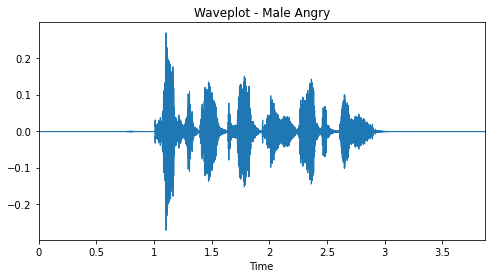

In [23]:
display_waveplot(x, sr, "Waveplot - Male Angry")

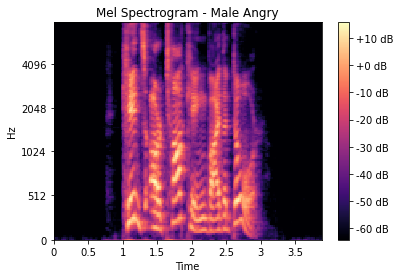

In [24]:
display_log_mel_spectrogram(x, sr, "Mel Spectrogram - Male Angry")

## Female Fearful
---

In [25]:
x, sr = librosa.load("./data/audio_files/Actor_06/03-01-06-01-01-01-06.wav")

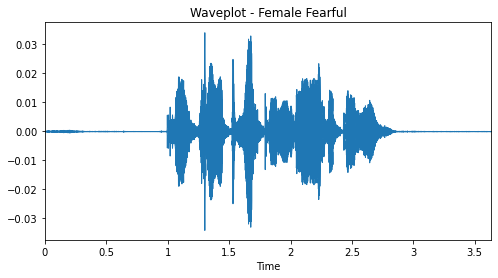

In [26]:
display_waveplot(x, sr, "Waveplot - Female Fearful")

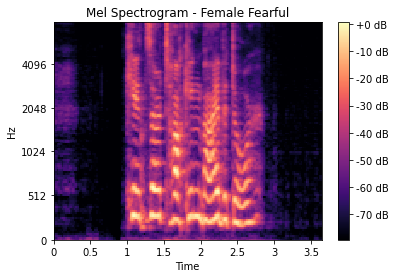

In [27]:
display_log_mel_spectrogram(x, sr, "Mel Spectrogram - Female Fearful")

## Male Disgust
---

In [28]:
x, sr = librosa.load("./data/audio_files/Actor_07/03-01-07-01-01-01-07.wav")

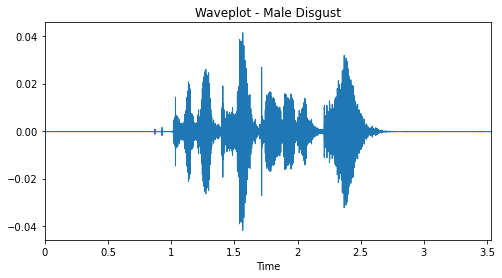

In [29]:
display_waveplot(x, sr, "Waveplot - Male Disgust")

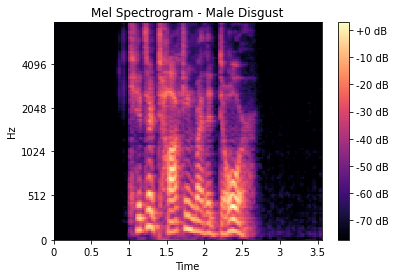

In [30]:
display_log_mel_spectrogram(x, sr, "Mel Spectrogram - Male Disgust")

## Female Surprised
---

In [31]:
x, sr = librosa.load("./data/audio_files/Actor_08/03-01-08-01-01-01-08.wav")

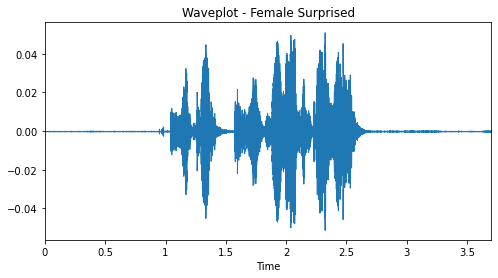

In [32]:
display_waveplot(x, sr, "Waveplot - Female Surprised")

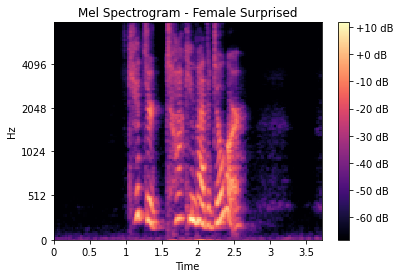

In [33]:
display_log_mel_spectrogram(x, sr, "Mel Spectrogram - Female Surprised")

# Initial Data Preprocessing
---

In [9]:
actors_list = get_actors_list("./data/audio_files")

actors_list

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [10]:
audio_df = create_audio_files_df(actors_list, "./data/audio_files")
audio_df

,Gender,Emotion,Actor,path
0,male,Surprise,1,./data/audio_files/Actor_01/03-01-08-02-02-01-...
1,male,Surprise,1,./data/audio_files/Actor_01/03-01-08-01-01-01-...
2,male,Angry,1,./data/audio_files/Actor_01/03-01-05-01-02-01-...
3,male,Fear,1,./data/audio_files/Actor_01/03-01-06-01-02-02-...
4,male,Fear,1,./data/audio_files/Actor_01/03-01-06-02-01-02-...
...,...,...,...,...
1435,female,Fear,24,./data/audio_files/Actor_24/03-01-06-02-01-02-...
1436,female,Fear,24,./data/audio_files/Actor_24/03-01-06-01-02-02-...
1437,female,Angry,24,./data/audio_files/Actor_24/03-01-05-01-02-01-...
1438,female,Surprise,24,./data/audio_files/Actor_24/03-01-08-01-01-01-...


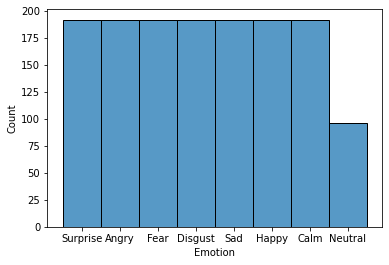

In [11]:
sns.histplot(data = audio_df.Emotion);

In [73]:
audio_df.to_csv("audio_df.csv")

# Feature Extraction
---
### Iterating over all the audio files, extracting log mel spectrogram mean values
### and importing them into the master dataframe for modelling purposes...

In [16]:
df = pd.DataFrame(columns = ["mel_spectrogram"])

counter = 0

for index, path in enumerate(audio_df.path):
    x, sr = librosa.load(path, res_type = "kaiser_fast", duration = 3, sr = 44100, offset = .5)

    # Retrieve the mel-scaled spectrograms, transform both the y-axis (frequency) to log scale,
    # and the x-axis (color/amplitude) to Decibels, i.e. log scale of amplitudes
    spectrogram = librosa.feature.melspectrogram(y = x, sr = sr, n_mels = 128, fmax = 8000)
    db_spec = librosa.power_to_db(spectrogram)
    log_spectrogram = np.mean(db_spec, axis = 0)

    df.loc[counter] = [log_spectrogram]
    counter = counter + 1

# Concactenate the dataframes for the purpose of modelling
modeling_df = pd.concat([audio_df, pd.DataFrame(df["mel_spectrogram"].values.tolist())], axis = 1)
modeling_df = modeling_df.fillna(0)
modeling_df.drop(columns = "path", inplace = True)

In [17]:
modeling_df.head()

,Gender,Emotion,Actor,0,1,2,3,4,5,6,...,249,250,251,252,253,254,255,256,257,258
0,male,Surprise,1,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,...,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218,-71.200218
1,male,Surprise,1,-70.461052,-70.461052,-70.461052,-70.461052,-70.461052,-70.461052,-70.461052,...,-70.461052,-70.461052,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,male,Angry,1,-64.176788,-64.393738,-64.444954,-64.268044,-64.303825,-64.468147,-64.468147,...,-64.468147,-64.468147,-64.468147,-64.468147,-64.422607,-64.364937,-64.468147,-64.465858,-64.354759,-64.385941
3,male,Fear,1,-73.280296,-73.280296,-73.280296,-73.280296,-73.280296,-73.255249,-73.086319,...,-72.866135,-73.029083,-73.021973,-73.157417,-73.278503,-73.280296,-73.272202,-73.042091,-72.969475,-73.264915
4,male,Fear,1,-44.965843,-44.467876,-44.512608,-44.934807,-44.679760,-44.350895,-45.161110,...,-42.328346,-42.546494,-43.290047,-42.981064,-43.380680,-44.499775,-44.815922,-45.377876,-45.876091,-46.404274


In [78]:
modeling_df.to_csv("modeling_df.csv")